<font color='blue'> **CRS_earthPy** </font> 

In [ ]:
#use with environment "hydroclass"   # package for cool and accessible colormaps (https://www.fabiocrameri.ch/colourmaps-userguide/)
import rasterio ; import os ; import rioxarray as rxr ; from rasterio.plot import plotting_extent 
import numpy as np ; import matplotlib.pyplot as plt ; from matplotlib.dates import DateFormatter
import matplotlib.colors as mcolors  ;  import pandas as pd ; import geopandas as gpd ; import rasterio as rio 
import rasterio.plot as rioplot      ; import earthpy.spatial as es ; import earthpy.plot as ep ; from dataretrieval import nwis ; from pathlib import Path 
from flopy.utils import GridIntersect, Raster

In [2]:
workspace = Path("./03")   ; workspace.mkdir(exist_ok=True)                                    
Pref1 =  ('E:\\15_REPOS\\a07_EarthPy\\Tacho_02\\a00_Tacho_raster.tif')    ; #epsg = 4326
Path2  = ('E:\\15_REPOS\\a07_EarthPy\\Tacho_02\\')                        ; ref2 = 'a00_Tacho_raster.tif' 
Path3  = Path2                                                            ; ref3 = '06_bacia_vetor.shp' 
bacia_ref3_path = os.path.join(Path3,  ref3)                              ; bacia_ref3 = gpd.read_file(bacia_ref3_path)   

In [3]:
ref1_crs  = es.crs_check(Pref1)                          ; bound_utm       = bacia_ref3.to_crs(ref1_crs) 
ref1_data = rxr.open_rasterio(Pref1, masked=True)        ; ref_both_extent = plotting_extent(ref1_data[0], ref1_data.rio.transform())

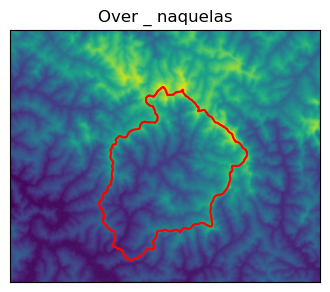

In [7]:
f, ax = plt.subplots(figsize=(4, 4))
ep.plot_rgb(ref1_data.values,rgb=[0],ax=ax,title="Over _ naquelas",extent=ref_both_extent)  #; bound_utm.plot(ax=ax) ; plt.show()
bound_utm.boundary.plot(ax=ax, color='red') ; plt.show()

In [5]:
Pref1_data            = rxr.open_rasterio(Pref1, masked=True).rio.clip(bound_utm.geometry)
naip_clip_plot_extent = plotting_extent(Pref1_data[0], Pref1_data.rio.transform())  ; print(ref_both_extent,naip_clip_plot_extent) ; #bound_utm['geometry'] ; bound_utm 
#f, ax = plt.subplots()  ; bound_utm.boundary.plot(ax=ax) ; plt.show()

(456972.2813, 477397.2813, 7605680.25, 7622267.75) (462809.7813, 472597.2813, 7607105.25, 7618530.25)


In [ ]:
#with rio.open(Pref1) as src:
#    elevation = src.read(1).astype("float")                                     ; elevation[elevation < 0] = np.nan
#hillshade = es.hillshade(elevation)                                             ; fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 12), dpi=500)
#ep.plot_bands(elevation, cmap="gist_earth", title="Original TIFF"                    ,ax=ax[0]) ; print(elevation.shape)      
#az = es.hillshade(elevation, azimuth=90, altitude=50)  ; ep.plot_bands(az,cbar=False ,ax=ax[1], title="Hillshade ")   # 210 0
#ep.plot_bands(elevation,cmap="terrain", title="Lidar DEM overlayed "                 ,ax=ax[2]) ; ax[2].imshow(hillshade, cmap="Greys",alpha=0.5) ;plt.show()

#raster_dem_dataset=rasterio.open(os.path.join(Path2, ref2)) ;dem_masked=raster_dem_dataset.read(1,masked=True)  ;dem_metadata=raster_dem_dataset.meta.copy()
#hillshade_numpy = es.hillshade(dem_masked)
#hillshade_file = str(Path2) + '\\' + str('03c_Expo_hillshade.tif')   # ; ref3 ='03____.tif' 
#with rasterio.open(hillshade_file, 'w', **dem_metadata) as hillshade_dataset:
#    hillshade_dataset.write(hillshade_numpy, 1)                                   # Saving ... Hillshade